
# Machine Learning 2019/2020 - Challenge 2 - 16 December 2019

## Rules (read carefully):
- This year the results of the two challenges will count 10% and 15% respectively of your final score.
- If you work with a group of colleges (max 3 students), please remember your solution must be <b>"your solution"</b>, hence provide your individual answers/arguments/opinions/critics;
- Students of the same group can share <b>ONLY</b> the code.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it before the 1:59 PM of the 19 December 2019 (Rome Berlin time);
- The subject of your email must be: "[Challenge_2_solution] NAME - SURNAME - MATRICOLA."
- Double check the subject of your email and the attachments;
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b>;
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>
- The physical attendance to the lab is not mandatory, you can work from a remote place by following the identical rules.
- Your solution might be considered as the "copy" of others solutions, in that specific case the assigned score will be the result of the proposed solution divided by the number of "too much similar" solutions. If you share the code with the components of your "group" please comment the code and answer the questions by yourself.

- Monday 16 December, I will share the necessary key to unzip the content of the provided challenge material (I will also send a message on the Google group).
- To unzip the content of the zip you will use the above key
- Then read carefully all the part of the jupyter notebook and fill all mandatory fields.
- <b>Don't write "personal" emails</b> to Stefano Faralli, but please <b>use the google group</b> I will reply until 12 AM of 17 December 2019 <b>(strict deadline)</b>. 
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b> hence, please use the provided corresponding "YOUR COMMENTS" cell</b> 



## Identification (Mandatory)

In [1]:
# Identification
# assign the following string values
yourNameSurname='Giuseppe Fontana'
yourMatricolaNumber='1870948'
yourStudentEMAIL='fontana.1870948@studenti.uniroma1.it'
yourColleguesNameSurnames=['Fabio Galassi']

# Lego Bricks Visual Classification
<img src="45020_Prod_03.jpg"/>

## Description of the task:
<br>
devolop a classifier able to classify with a <b>weighted avg F1 score greater than 0.60</b> pictures of Lego bricks taken at different angles.
Use Keras and scikit-learn to develop, train and evaluate a CNN with:<br>
- Convolutional and Pooling operations<br>  
- a dense sub network at the end <br>


## Part 1 -  Dataset (max 6/30)

### Part 1-a  - Load the dataset (3/6 pts)
The provided dataset is composed by pictures of Lego bricks, taken at different angles:<br>
As an example the following picture:<br>
<img src="dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"/> 
corresponds to the png file in "dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"
- "201706171206-0001.png" is the name of the file;
- "2357 Brick corner 1x2x2" is the label of the Lego brick type;
- "train" means that this is the portion of the dataset you must use for the training
Inside the folder <b>dataset</b> you can find another subfolder <b>validatetest</b>.
The content inside of <b>validatetest</b> must be used (after a proper split) for validation during training and for testing during the evaluation.


Load the dataset and create: 
- X_train, y_train from the content in "dataset/train/"
- X_validate,y_validate,X_test,y_test as a split (20% for validation and 80% for test) of the content in "dataset/validatetest/"

<b>Tips:</b>
- you can use CV2 or matplotlib to load pictures
- check the file you are loading is ending with ".png"


In [3]:
# imports
import os
import cv2
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as skl
import sklearn.preprocessing as preproc
import numpy as np
import keras as k
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from time import time

In [4]:
 # CODE OF PART 1 - "Load the Dataset"
def loadPictures(path):
    for _,dirs,_ in os.walk(path):
        X=[];
        y=[];
        for dir in dirs:
            for _,_,files in os.walk(path+dir+"/"):
                for file in files:
                    if file.find('.png')<0:
                        continue     
                    #print("Loading:"+path+dir+"/"+file)
                    img = cv2.imread(path+dir+"/"+file)
                    img_resize = cv2.resize(img, (199,199))
                    # grayscale
                    gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
                    X.append(gray)
                    y.append(dir)
        return X,y


X_train,y_train = loadPictures('/home/user1/Desktop/CHALLENGE_2/CHALLENGE_2/dataset/train/')
X_valtest, y_valtest=loadPictures('/home/user1/Desktop/CHALLENGE_2/CHALLENGE_2/dataset/validationandtest/')


# splitting test and validation
X_test,X_validate,y_test,y_validate = train_test_split(X_valtest, y_valtest, test_size=0.20)

# your comments:

In this phase we have loaded the images, then we converted them in grayscale format (it was more comfortable to perform here, embedded in the loadPictures function); 
finally we split as requested the sets according to "80% test - 20% validation" format.
Size of images is 199x199 pixels.

### Part 1-b Dataset  preprocessing (3/6 pts max)
Since you are using the dataset for a classification task using Keras API you will need to perform some dataset tranformations:<br>
1) tranform all the images into grayscale having a final shape of (dim,dim,1)  dim<200;<br>
<img src="info.png">
2) encode properly the target features for train, test and validation<br>

<b>Tips:</b>
- you can use CV2 and numpy to tranform and reshape the pictures


In [5]:
# CODE OF PART 1 - "Dataset  preprocessing"


#Grayscale fatto nel blocco precedente

X_train = np.reshape(X_train, (len(X_train), 199, 199, 1))
X_test = np.reshape(X_test, (len(X_test), 199, 199, 1))
X_validate = np.reshape(X_validate, (len(X_validate), 199, 199, 1))

#Encoding
    
l_enc = preproc.LabelEncoder()
h_enc = preproc.OneHotEncoder(sparse=False)

l_enc.fit(y_train)
y_trainLabels = l_enc.transform(y_train)
y_testLabels = l_enc.transform(y_test)
y_validateLabels = l_enc.transform(y_validate)



h_enc.fit(y_trainLabels.reshape(-1,1))
y_trainHot = h_enc.transform(y_trainLabels.reshape(-1,1))
y_testHot = h_enc.transform(y_testLabels.reshape(-1,1))
y_validateHot = h_enc.transform(y_validateLabels.reshape(-1,1))



C:\Users\fabiu\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# your comments:

Image transformation is performed in the previous code block.
In the encoding phase we opted for one-hot encoding (because otherwise we could have some troubles in the later performances).
Anyways we had to do an intermediate step in which prepare the input for the one-hot encoder in a Label-like format, due to the fact that passing names of folders as strings issued some errors (during the trials we noted that starting from strings was not too much good for the encoder)

## Part 2 - Training (max 12 pts)
## Part 2.a - create and train a  working CNN (10/10 pts)
use Keras: with Convolutional and Pooling operations and a dense sub network at the end, use properly the preprocessed portions of the dataset (train and validation) and apply scaling.

## Part 2.b -  save the learned model (2/10 pts)
save the model to a file

In [6]:
#code for Part 2 - Training


def train_model1(): 
    input_img = Input(shape=(199, 199, 1))  # 1x199x199 image con 1 canale solo (grigio) 
    x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_img) # 16x199x199
    x = MaxPooling2D((2, 2), padding='same')(x) # 16x100x100
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 8x100x100
    x = MaxPooling2D((2, 2), padding='same')(x) # 8x50x50
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) # 8x50x50
    x = MaxPooling2D((2, 2), padding='same')(x) # 8x25x25
    x = Flatten()(x)
    encoded = Dense(16, activation='softmax')(x)
    
    classifier = k.models.Model(input_img, encoded)
    classifier.compile(optimizer='adadelta', loss='binary_crossentropy') 

 
    classifier.fit(X_train, y_trainHot, epochs=15, batch_size=200, shuffle=True, validation_data=(X_validate, y_validateHot)) 

    #Salvataggio
    classifier.save('classifier.h5')
    

#Scaling
X_train = X_train.astype('float32') / 255
X_validate = X_validate.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [7]:
train_model1()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6379 samples, validate on 1276 samples
Epoch 1/15





6379/6379 [==============================] - 61s 10ms/step - loss: 0.2005 - val_loss: 0.1744
Epoch 2/15
6379/6379 [==============================] - 49s 8ms/step - loss: 0.1384 - val_loss: 0.1120
Epoch 3/15
6379/6379 [==============================] - 50s 8ms/step - loss: 0.1089 - val_loss: 0.1023
Epoch 4/15
6379/6379 [==============================] - 50s 8ms/step - loss: 0.0903 - val_loss: 0.0792
Epoch 5/15
6379/6379 [==============================] - 54s 9ms/step - loss: 0.0768 - val_loss: 0.0606
Epoch 6/15
6379/6379 [==============================] - 64s 10ms/step - loss: 0.0638 - val_loss: 0.0624
Epoch 7/15
6379/6379 [==============================] - 65s 10ms/step - loss: 0.0567 - val_loss: 0.0537
Epoch 8/15
6379/6379 [==============================] - 70s 11ms/step - loss: 0.0493 - val_loss: 0.0463
Epoch 9/15
6379/

# your comments:

Here we projected the CNN: it performs some Conv2D and MaxPooling functions, taking in input images [199x199x1] and building volumes [25x25x8]; these volumes are flatten and given as input for the Dense function with softmax activator; we didn't apply any striding because even if information was kept in the centre of images, we don't think they are enough "blurred" to make reasonable striding procedure. We opted for the first kernel 5x5 big (not enough big to lose information and not too much small to degrade performances); following filters are 3x3 to keep in such a way accuracy.
Before calling the CNN training (train_model1()) we rescaled pixel values normalyzing them (values between 0 and 1).
As expected, there was a moment in which performances didn't grow anymore (after the 10th epoch).
training_model1() saves the computed model in the end.

# Part 3 - Evaluation (max 10 pts)
## Part 3.a - Test (max 8/10 pts)
- use the classifier built during Part 2, to classify the lego brick label of each picture of your Test dataset portion.
- print the classifcation report

## Part 3.b - minal f1 requirement (max 2/10 pts)
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.60 you get 1 point
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.70 you get 1 point
- if from the report you printed in part 3.a the weighted avg F1 is less or equal to 0.60 you get -2 points

In [8]:
#code for  part 3
classifier = k.models.load_model('classifier.h5')

predictions = classifier.predict(X_test)

pred_reverse = h_enc.inverse_transform(predictions)

print(skl.metrics.classification_report(y_testLabels, pred_reverse))

print('F1-score: '+ str(round(skl.metrics.f1_score(y_testLabels, pred_reverse, average='micro'),2)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       313
           1       0.94      0.81      0.87       315
           2       1.00      1.00      1.00       307
           3       1.00      1.00      1.00       329
           4       1.00      1.00      1.00       325
           5       0.99      0.99      0.99       329
           6       1.00      0.98      0.99       329
           7       0.63      0.85      0.73       308
           8       0.96      0.98      0.97       320
           9       1.00      0.99      1.00       316
          10       0.97      0.90      0.94       327
          11       0.99      1.00      1.00       326
          12       0.90      0.98      0.94       324
          13       1.00      1.00      1.00       315
          14       0.76      0.55      0.64       294
          15       0.99      1.00      1.00       326

    accuracy                           0.94      5103
   macro avg       0.94   

# your comments:

As expected, predictions are in softmax format: each entry is an array of 16 floats, their sum is 1 and enlights the "most probable" labels. We applied reverse transformation to take back the "labeled" values (from 0 to 15) of predictions and compared them with label-encoded format of y_test. Outcomes are impressives in my opinion, and given that some executions give low accuracy and recall we are pretty sure that the model is not overfit.

# Part 4 - Feature importance (max 2/30 pts)
## Part 4.a perform a pixel based feature importance analysis on the validation portion of the dataset (1 pts)
## Part 4.b plot the corresponding heatmap of pixel importance (1 pts)



Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 39.936s


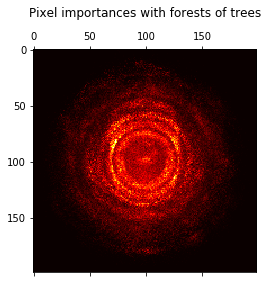

In [11]:
# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1

# Load the images
X, y = X_validate.reshape(1276, 39601), y_validateHot

# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on images data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(199,199)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees\n")
plt.show()

# your comments:

We performed feature importance on another model (an extratree ensamble). From the result we can confirm what we was expecting: pixels on the board are black because they give no information about lego's (bricks are centered in the images); moreover, we observe "concentric rings" of information due to the fact that bricks are photographed in many angulations (I suppose that angles where well uniform-distributed too).

Nota finale per il professore: personalmente ho avuto delle serie difficoltà nello svolgimento della challenge su macchina virtuale, perché la ram veniva saturata da entrambi i sistemi operativi e al momento del training del modello il kernel di Anaconda andava in crash. Anche pensando di soddisfare i minimi requisiti hardware, non avrei potuto superare la prova se l'avessi sostenuta senza compagni.

# Part 5 - Extra point
- if from the report you printed in part 3.a the weighted avg F1 is greater tha 0.85 you get 1 point



<img src="dexter.jpg"/>